In [1]:
import open_xarray as ox
import numpy as np
import xarray as xr
import matplotlib.pyplot as pl

ds=ox.open_xarray('/fs/ess/PFS0220/LSM/SEUS/SEUS_20220705_larger_domain/SEUS.default.0000000.nc')

pl.rcParams['xtick.labelsize'] = 12
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['axes.labelsize'] = 16
pl.rcParams['axes.titlesize'] = 16
pl.rcParams['legend.fontsize'] = 12

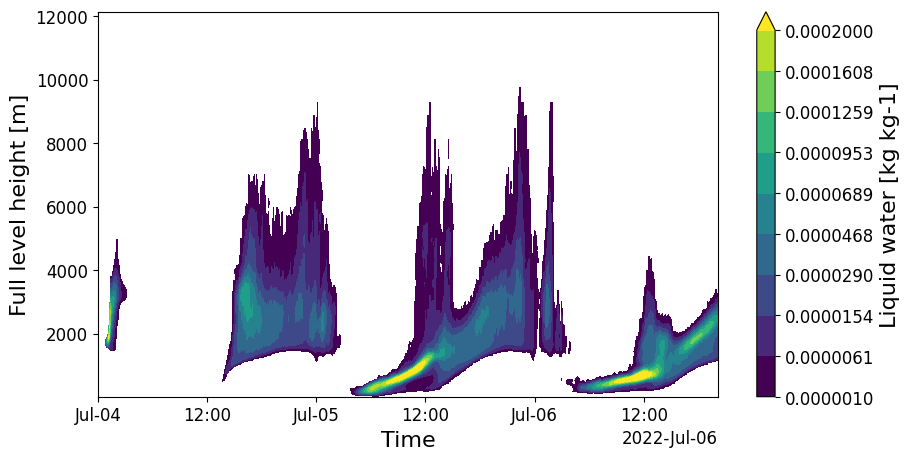

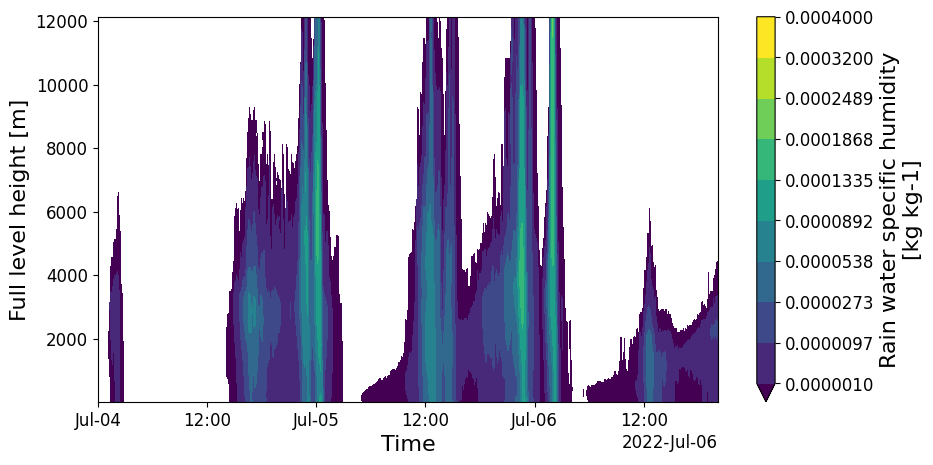

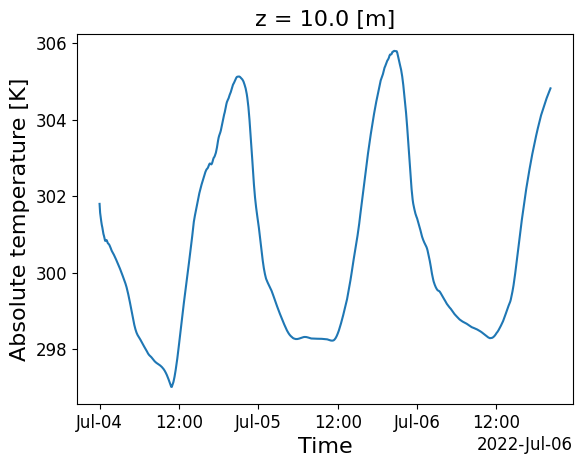

In [2]:
def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power( np.linspace(start, stop, num=num), power)
pl.figure(figsize=(10,5))
ds['ql']=ds['ql'].where(ds['ql']>1e-6,np.nan)
ds.ql.plot.contourf(x='time',levels=powspace(1e-6,2e-4,2,10),cmap='viridis')

pl.figure(figsize=(10,5))
ds['qr']=ds['qr'].where(ds['qr']>1e-10,np.nan)
ds.qr.plot.contourf(x='time',levels=powspace(1e-6,4e-4,2,10),cmap='viridis')

pl.figure()
ds.T.isel(z=0).plot()

Text(0.5, 1.0, '2022-07-05 19:45:00')

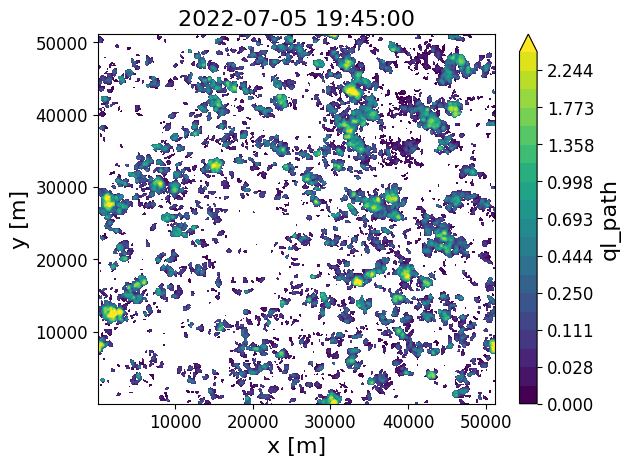

In [12]:
ds2=xr.open_dataset('/fs/ess/PFS0220/LSM/SEUS/SEUS_20220705_larger_domain/ql_path.xy.nc',decode_times=False)

from datetime import datetime, timedelta

start_time=datetime(2022,7,4,00)
pl.figure()
ds2['ql_path']=ds2['ql_path'].where(ds2['ql_path']>1e-6,np.nan) 
ds2['ql_path'].isel(time=int((19.75+24)*3600/900)).plot.contourf(levels=powspace(1e-6,2.5,2,20),cmap='viridis')
pl.title(start_time+timedelta(hours=((19.75+24))))
